In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_excel('Monthly-Sales-for-Laptops-Test.xlsx')

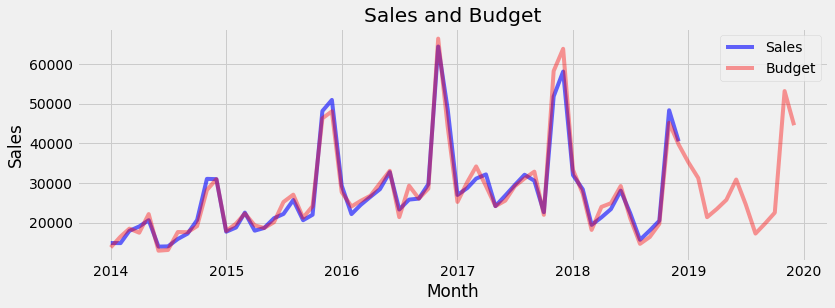

In [6]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
# Setting FiveThirtyEight style
plt.style.use('fivethirtyeight')
d

In [7]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [8]:
data['Month'].min(), data['Month'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2019-12-01 00:00:00'))

In [41]:
data1=data[data.Sales!=0]
min_value=data1['Sales'].min()
max_value=data1['Sales'].max()

In [9]:
data=data.sort_values('Month')

In [10]:
data.isnull().sum()

Month      0
Sales     12
Budget     0
dtype: int64

In [11]:
data = data.groupby('Month')['Sales'].sum().reset_index()

In [12]:
data = data.set_index('Month')
data.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
      

In [13]:
y = data['Sales'].resample('MS').mean()

In [14]:
y

Month
2014-01-01    14840.0
2014-02-01    14820.0
2014-03-01    17920.0
2014-04-01    19020.0
2014-05-01    20600.0
2014-06-01    13940.0
2014-07-01    14000.0
2014-08-01    15860.0
2014-09-01    17220.0
2014-10-01    20640.0
2014-11-01    31040.0
2014-12-01    30960.0
2015-01-01    17700.0
2015-02-01    18760.0
2015-03-01    22520.0
2015-04-01    17960.0
2015-05-01    18640.0
2015-06-01    21100.0
2015-07-01    22180.0
2015-08-01    25700.0
2015-09-01    20600.0
2015-10-01    21980.0
2015-11-01    48160.0
2015-12-01    50960.0
2016-01-01    29360.0
2016-02-01    22140.0
2016-03-01    24460.0
2016-04-01    26520.0
2016-05-01    28440.0
2016-06-01    32740.0
               ...   
2017-07-01    29460.0
2017-08-01    32080.0
2017-09-01    30560.0
2017-10-01    22620.0
2017-11-01    51840.0
2017-12-01    58120.0
2018-01-01    32000.0
2018-02-01    28400.0
2018-03-01    19420.0
2018-04-01    21320.0
2018-05-01    23400.0
2018-06-01    28060.0
2018-07-01    22380.0
2018-08-01    15660.0
2018

In [15]:
y=y[:'2018']

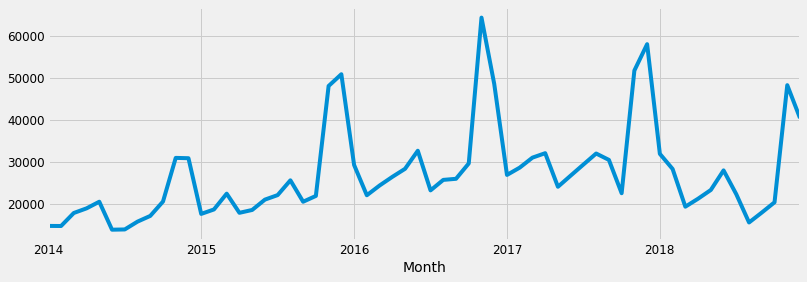

In [16]:
y.plot(figsize=(12, 4))
plt.show()

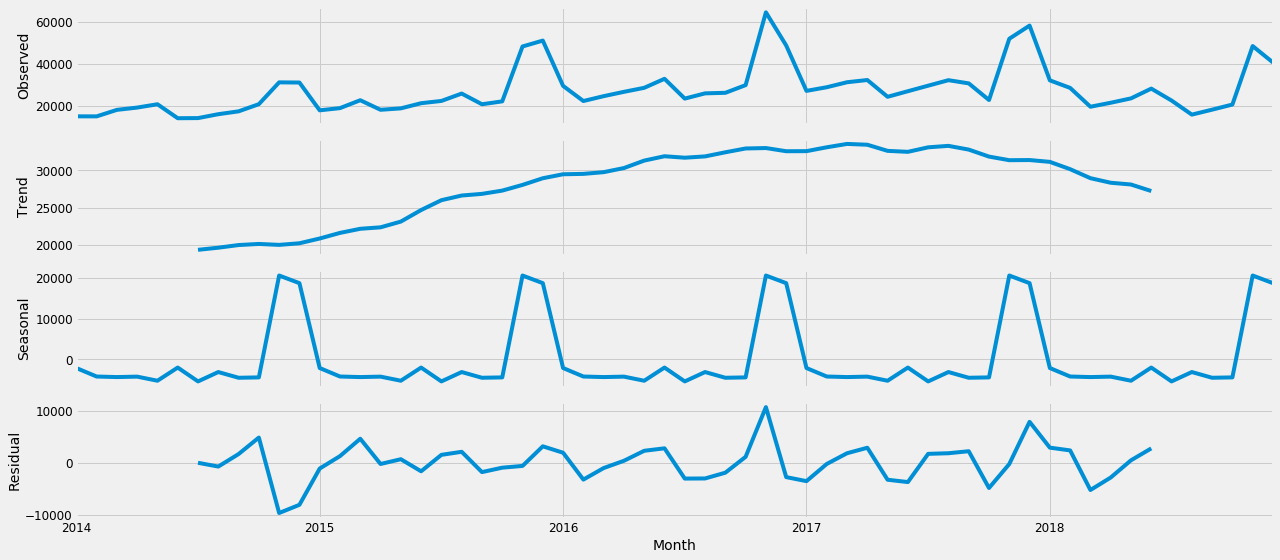

In [19]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Autoregressive Integrated Moving Average (ARIMA MODEL)

In [21]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1384.0141976966663
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1080.1671994681415
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:986.5498802643714


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1403.285812813527
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1008.4190937081976
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:992.3573954496799
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:754.8979226638513


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1047.6163821751074
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1317.8421810178654
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1040.5801311139019
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:946.7852696838115
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1339.7713205379698
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1080.8058762569995
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1037.9399875736317
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:739.8666677163035
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1289.9170323477579
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1241.7029656497584
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:979.8638215477454
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:959.1532508377582


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1397.5625588212351
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:978.811335560274
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:957.3716145151927
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:718.8419953764319


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1340.8900874801634
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1222.8302983447293
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:957.1302253566579
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:934.0091233503848


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1577.3687795749365
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:986.3713672383805
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:946.1775385478103
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:721.9221017792521


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1323.1043422801786
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1262.8502914285684
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:999.3139261764841
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:971.1190632288112


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1384.5732736998011
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:983.444550732685
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:984.9998264230652
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:716.8922117438665


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1048.999120171601
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1244.5296749518134
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:980.6266571271085
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:947.9168052653831


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1274.5264265095855
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:985.3437966222958
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:966.1339723256515
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:717.8491246236355


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1279.5893089157266
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1243.5997956200463
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:981.223940541791
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:961.0633543060344


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1318.7691545802732
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:961.0258945991507
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:968.1213273563615
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:700.3459852371301


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1358.5383378680299
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1212.6485453647058
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:954.3483932537127
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:932.0065925303262
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2786.856432389819
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:965.1500038514938
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:946.1538748091137
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:696.9557318288305
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1329.7931852557078


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2642      0.470      0.562      0.574      -0.657       1.186
ma.L1         -0.7039      0.437     -1.612      0.107      -1.560       0.152
ar.S.L12      -0.6212      0.200     -3.100      0.002      -1.014      -0.228
sigma2      5.102e+07   1.68e-09   3.04e+16      0.000     5.1e+07     5.1e+07


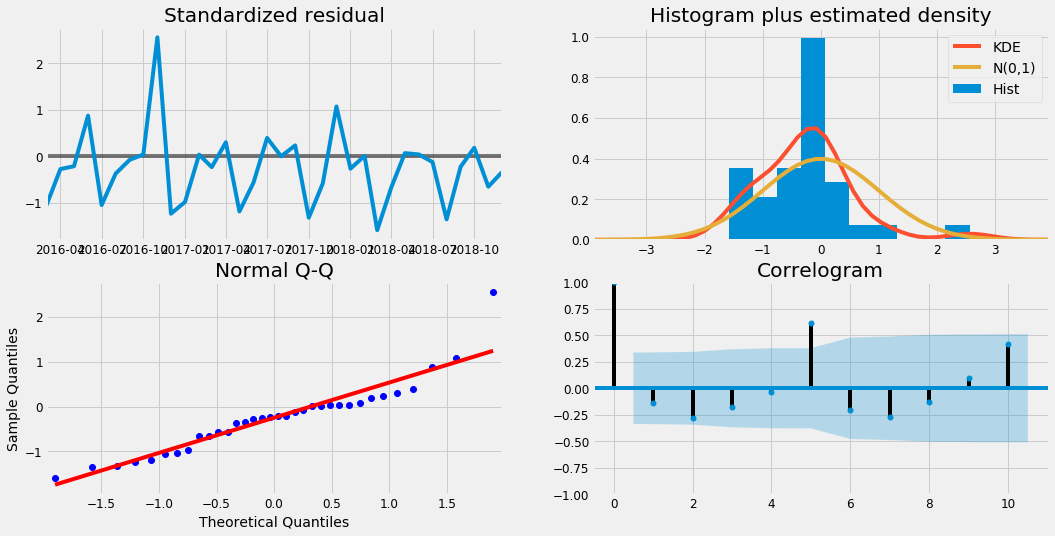

In [24]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

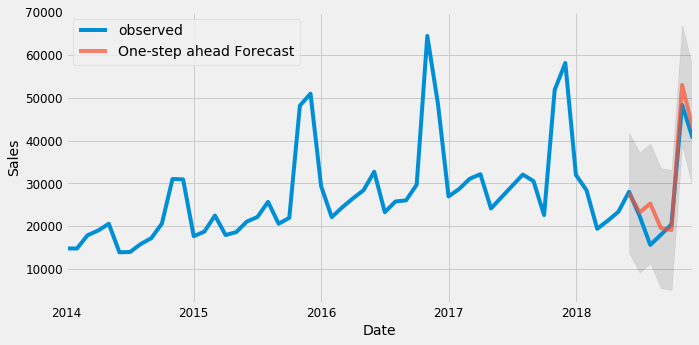

In [25]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 17947685.15


In [28]:
print('The Root Mean Squared Error of our forecasts is ${}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is $4236.47


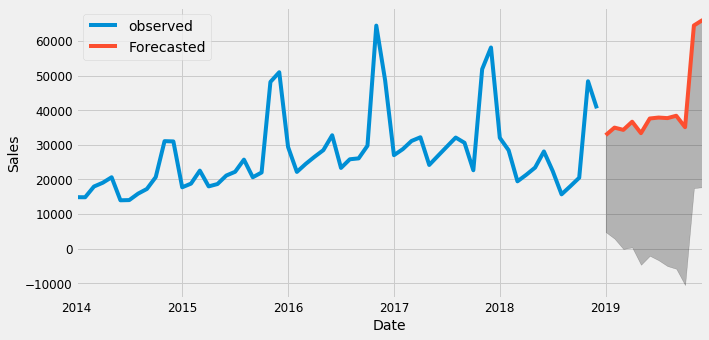

In [58]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(10, 5))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
pred_ci['upper Sales'].plot(ax=ax, label='Forecasted')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [59]:
print(pred_uc)

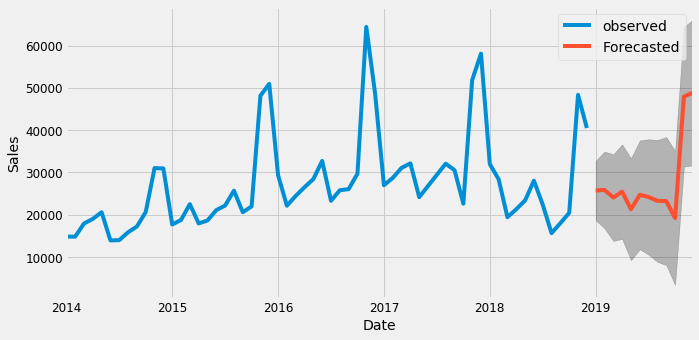

In [66]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
for i in range(pred_ci.shape[0]):
    pred_ci['lower Sales'][i]= pred_ci['lower Sales'][i]+min_value
ax = y.plot(label='observed', figsize=(10, 5))
pred__mean=(pred_ci['lower Sales']+pred_ci['upper Sales'])/2
pred__mean.plot(ax=ax, label='Forecasted')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()


In [108]:
check=np.ceil(pred__mean)

### Final Predictions for 2019

In [109]:
pred__mean

2019-01-01    25734.670552
2019-02-01    25872.923755
2019-03-01    24060.571213
2019-04-01    25468.215584
2019-05-01    21294.739570
2019-06-01    24714.482171
2019-07-01    24203.039645
2019-08-01    23284.776549
2019-09-01    23234.730633
2019-10-01    19227.145301
2019-11-01    47947.073367
2019-12-01    48877.791432
Freq: MS, dtype: float64

In [110]:
data1=pd.read_excel('Monthly-Sales-for-Laptops-Test.xlsx')


In [111]:
data1

,Month,Sales,Budget
0,2014-01-01,14840.0,13740.0
1,2014-02-01,14820.0,16466.0
2,2014-03-01,17920.0,18474.0
3,2014-04-01,19020.0,17449.0
4,2014-05-01,20600.0,22150.0
5,2014-06-01,13940.0,12907.0
6,2014-07-01,14000.0,13084.0
7,2014-08-01,15860.0,17622.0
8,2014-09-01,17220.0,17571.0
9,2014-10-01,20640.0,19111.0


In [119]:
data1.iloc[60:,1] = check.values

In [120]:
data1.iloc[60:,1]

60    25735.0
61    25873.0
62    24061.0
63    25469.0
64    21295.0
65    24715.0
66    24204.0
67    23285.0
68    23235.0
69    19228.0
70    47948.0
71    48878.0
Name: Sales, dtype: float64

In [121]:
data1

,Month,Sales,Budget
0,2014-01-01,14840.0,13740.0
1,2014-02-01,14820.0,16466.0
2,2014-03-01,17920.0,18474.0
3,2014-04-01,19020.0,17449.0
4,2014-05-01,20600.0,22150.0
5,2014-06-01,13940.0,12907.0
6,2014-07-01,14000.0,13084.0
7,2014-08-01,15860.0,17622.0
8,2014-09-01,17220.0,17571.0
9,2014-10-01,20640.0,19111.0


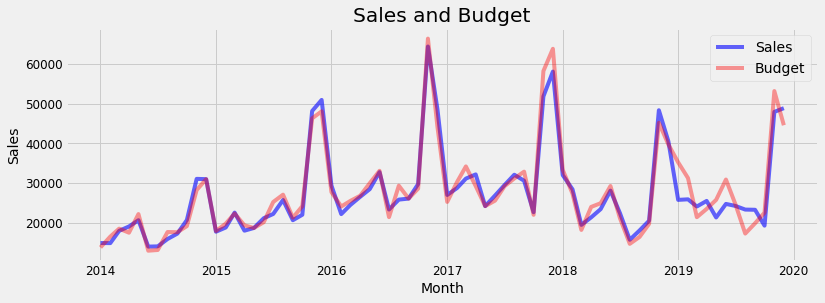

In [122]:
data=data1

plt.figure(figsize=(12, 4))
plt.plot(data['Month'], data['Sales'], 'b-', label = 'Sales', alpha=0.6)
plt.plot(data['Month'], data['Budget'], 'r-', label = 'Budget', alpha=0.4)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales and Budget')
plt.legend()
plt.show()

In [123]:
data.to_csv('result.csv')